## Ice Cream Revenue Prediction using Simple Linear Regression Model

Created by: Ardian Kris Bramantyo

Date: June 20, 2022

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [3]:
df = pd.read_csv('/content/IceCreamData.csv')

### Data Exploration

In [4]:
df.head()

,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317


In [5]:
df.tail()

,Temperature,Revenue
495,22.3,525
496,32.9,756
497,12.6,307
498,22.4,567
499,29.0,656


In [6]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.281600,522.058000
std,8.097597,175.410399
min,0.000000,10.000000
25%,17.175000,406.000000
50%,22.400000,530.000000
75%,27.800000,643.000000
max,45.000000,1000.000000


In [7]:
df.info() #to check for missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


### Data Visualization

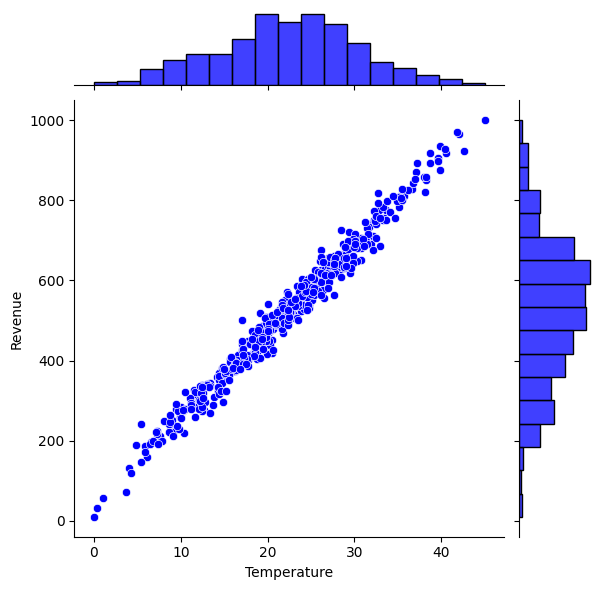

In [8]:
sns.jointplot(x='Temperature', y='Revenue', data=df, color = 'blue')

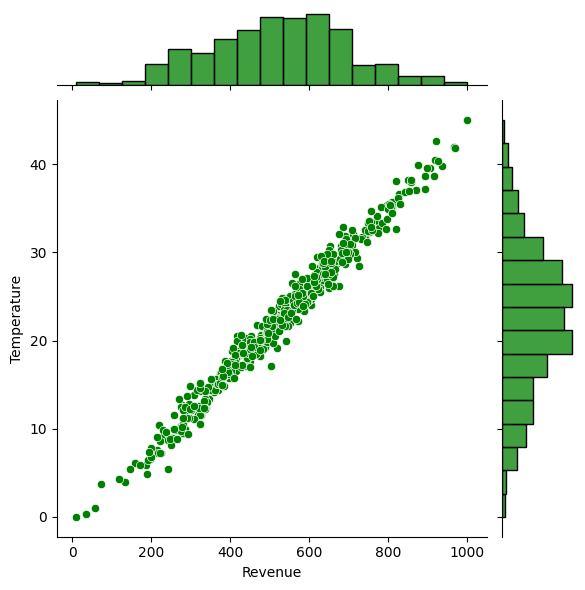

In [9]:
sns.jointplot(x='Revenue', y='Temperature', data=df, color = 'green')

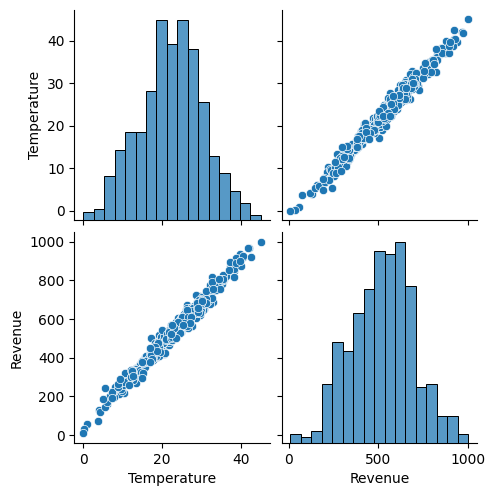

In [10]:
sns.pairplot(df)

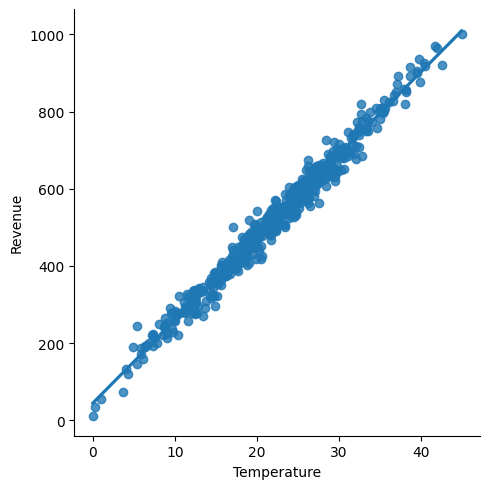

In [11]:
sns.lmplot(data = df, x='Temperature', y='Revenue')

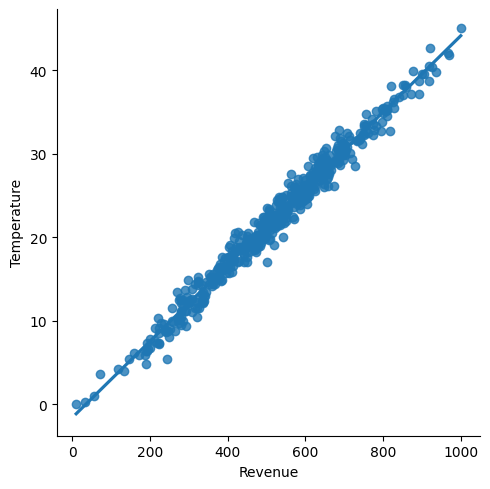

In [12]:
sns.lmplot(data = df, x='Revenue', y='Temperature')

### Create Testing and Training Data

In [13]:
X = df[['Temperature']]

In [14]:
X

,Temperature
0,24.6
1,26.1
2,27.8
3,20.6
4,11.6
...,...
495,22.3
496,32.9
497,12.6
498,22.4


In [15]:
y = df['Revenue']

In [16]:
y

0      535
1      626
2      661
3      488
4      317
      ... 
495    525
496    756
497    307
498    567
499    656
Name: Revenue, Length: 500, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)

In [19]:
X_train

,Temperature
227,27.0
417,27.6
203,10.5
126,16.0
329,42.0
...,...
106,23.8
270,24.7
348,38.2
435,16.0


In [20]:
X_test

,Temperature
361,29.8
73,27.4
374,24.0
155,21.2
104,26.6
...,...
220,24.9
176,21.4
320,15.2
153,19.8


In [21]:
X_train.shape

(375, 1)

In [22]:
X_test.shape

(125, 1)

In [23]:
y_train.shape

(375,)

In [24]:
y_test.shape

(125,)

### Train the Model

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression()

In [26]:
print('Linear Model Coefficient (m)', regressor.coef_)
print('Linear Model Coefficient (b)', regressor.intercept_)

Linear Model Coefficient (m) [21.37601787]
Linear Model Coefficient (b) 46.298343092875996


### Test the Model

In [27]:
y_predict = regressor.predict(X_test)

In [28]:
y_predict

array([683.30367574, 632.00123285, 559.32277207, 499.46992203,
       614.90041855, 304.94815937, 285.70974328, 315.63616831,
       505.88272739, 685.44127753, 723.91810971, 401.14023981,
       431.06666483, 672.61566681,  52.71114846, 200.20567179,
       522.98354169, 563.59797565, 584.97399352, 683.30367574,
       557.18517029, 783.77095975, 655.51485251, 570.01078101,
       912.027067  , 666.20286145, 315.63616831, 632.00123285,
       732.46851686, 698.26688826, 435.3418684 , 471.68109879,
       711.09249898, 800.87177405, 640.55164   , 493.05711666,
       745.29412758, 317.7737701 , 262.19612362, 131.80241459,
       582.83639174, 230.13209681, 548.63476314, 392.58983266,
       437.47947019, 593.52440067, 572.1483828 , 125.38960923,
       475.95630236, 531.53394884, 623.4508257 , 503.7451256 ,
       484.50670951, 499.46992203, 550.77236492, 632.00123285,
       574.28598459, 679.02847217, 172.41684855, 661.92765787,
       584.97399352, 704.67969362, 535.80915241, 629.86

In [29]:
y_test

361    660
73     624
374    560
155    498
104    628
      ... 
220    564
176    521
320    375
153    494
231    450
Name: Revenue, Length: 125, dtype: int64

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @ Ice Cream Stand (Training Set)')

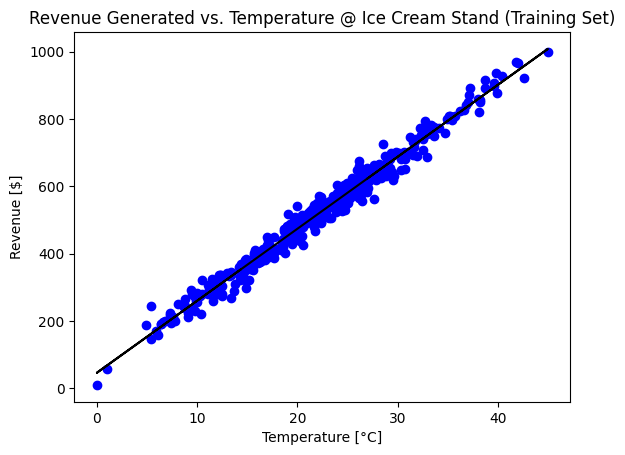

In [30]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.ylabel('Revenue [$]')
plt.xlabel('Temperature [°C]')
plt.title('Revenue Generated vs. Temperature @ Ice Cream Stand (Training Set)')

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @ Ice Cream Stand (Testing Set)')

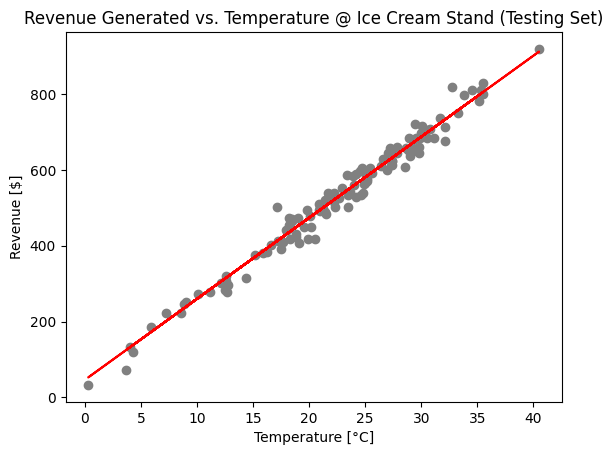

In [31]:
plt.scatter(X_test, y_test, color='grey')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.ylabel('Revenue [$]')
plt.xlabel('Temperature [°C]')
plt.title('Revenue Generated vs. Temperature @ Ice Cream Stand (Testing Set)')

### Make Prediction

In [32]:
T = [[25]]
revenue = regressor.predict(T)
revenue

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([580.69878995])

In [41]:
score = regressor.score(X_test, y_test)
score

0.9775975523219221